In [3]:
import nltk, os, matplotlib as mlt, sys
from matplotlib import pyplot as plt
import sklearn as sk, pandas as pd, numpy as np
import re, string as str
from nltk.corpus import stopwords
import time
# os.chdir("E:\\CSE 258\\Homework\\Assignment2\\fake-news")
nltk.download('punkt')
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/ubuntu/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [29]:
df = pd.read_csv("GuardianUncleaned.csv", encoding='utf-8')

In [30]:
df.text = df.text.str.replace("\n", "")
df.text[0]

'A post-Brexit Britain could become “highly attractive” to foreign investors put off by conditions inside the European Union, according to the head of Europe’s largest newspaper publisher. In an intervention at odds with the portrayal of Brexit by many other members of Europe’s corporate elite, Mathias Döpfner of Germany’s Axel Springer media group said that he was counting on the “pragmatism, on the free market orientation of the British people”. The chief executive of the politically conservative media group, which publishes newspapers including Germany’s largest-selling tabloid, Bild, told the Financial Times: “I very simply think that in the long run continental Europe may suffer more from the Brexit than England itself.” Döpfner’s comments come as some European leaders continued to be vocal in taking an uncompromising position on Brexit. The prime ministers of Slovakia and the Czech Republic said on Monday that Britain will be able to keep access to the European Union’s single mar

In [33]:
df['nExclams'] =  df.text.str.count("!")
# np.max(df['nExclams'])

172.0

In [39]:
df.dropna(inplace=True)

def count_caps(s):
    return np.sum([x.isupper() for x in s.split()])
df['Capital Words'] = df.text.apply(count_caps)
np.max(df['Capital Words'])

647.0

In [40]:
# Tokenizing text into bags of words
from nltk.tokenize import word_tokenize
def tokenize_s(s):
    if type(s) == float:
        return word_tokenize('')
    return word_tokenize(s)
df.text = df.text.apply(tokenize_s)

In [55]:
# Removing punctuation
import re
import string
    
punctuation = set(string.punctuation)
punctuation.add("’")
punctuation.add("“")
punctuation.add("”")

def remove_puncs(old_s):
    new_s = []
    for token in old_s:
        if not token in punctuation:
            new_s.append(token)
    return new_s

df.text = df.text.apply(remove_puncs)

In [54]:
"’" in punctuation

False

In [44]:
# Cleaning text of stopwords
def remove_stopwords(old_s):
    new_s = []
    for word in old_s:
        if not word in stopwords.words('english'):
            new_s.append(word)
    return new_s

for i,item in enumerate(df.text): 
    df.text[i] = remove_stopwords(item)
    if i%500 == 0:
        print(i)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000


In [45]:
# Saving it for the future use
df.to_csv("Guardian_Tokenized and stopwords removed.csv", index = False, encoding='utf-8')

In [48]:
# Stemming and Lemmatizing
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

porter = PorterStemmer()
snowball = SnowballStemmer('english')
wordnet = WordNetLemmatizer()

tracer = np.arange(25)*500
start_time = time.time()
for i,item in enumerate(df.text):
    final_doc = []
    for word in item:
        word = porter.stem(word)
        word = wordnet.lemmatize(word)
        final_doc.append(word)
    df.text[i] = final_doc
    if i in tracer:
        print(i,"th doc processed in %s seconds from the start"%(time.time() - start_time))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0 th doc processed in 0.5073263645172119 seconds from the start
500 th doc processed in 10.662531852722168 seconds from the start
1000 th doc processed in 17.834882974624634 seconds from the start
1500 th doc processed in 24.436376094818115 seconds from the start
2000 th doc processed in 32.01404666900635 seconds from the start
2500 th doc processed in 38.49237132072449 seconds from the start
3000 th doc processed in 45.40078353881836 seconds from the start
3500 th doc processed in 52.27977514266968 seconds from the start
4000 th doc processed in 59.659138202667236 seconds from the start
4500 th doc processed in 66.36204504966736 seconds from the start
5000 th doc processed in 73.44237923622131 seconds from the start
5500 th doc processed in 80.176096200943 seconds from the start
6000 th doc processed in 87.67254757881165 seconds from the start
6500 th doc processed in 94.28708052635193 seconds from the start
7000 th doc processed in 100.99548983573914 seconds from the start
7500 th do

In [56]:
# Saving it for the future use
df.to_csv("Guardian_Stemmed and Lemmatized.csv", index = False, encoding='utf-8')

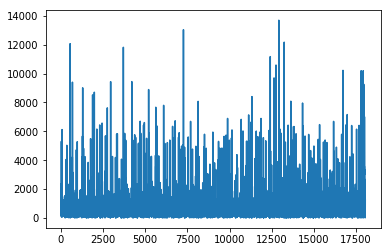

In [59]:
lengths = []
for doc in df.text:
    lengths.append(len(doc))

x = range(len(df.text))
plt.plot(x, lengths)
plt.show()

In [ ]:
sk.feature_extraction.text.TfidfVectorizer()